## 🧹 1. Data Cleaning & Preparation

Clean the dataset by:

- Removing duplicates
- Fixing incorrect or inconsistent values
- Ensuring column formats (date, currency, category) are accurate
- Handling any missing or anomalous data


In [14]:
# Import libraries
import pandas as pd

# Load the dataset
df = pd.read_excel("Downloads/RetailX_Sales_Data.xlsx")
df.head()  # ✅ Shows the top 5 rows after loading


,xs,Store ID,Product,Category,Units Sold,Unit Price,Revenue,Region,Payment Type,Return (Y/N),Average Revenue/transactions,VIRTUE STORYTELLING
0,2024-07-01,101,T-Shirt,Fitness,4,499,25987,North Zone,Debit Card,N,12995.5,NaN
1,2024-07-02,101,Earphones,Fitness,2,499,20986,West Zone,Credit Card,N,10494.0,NaN
2,2024-07-02,102,Earphones,Fitness,6,499,19996,East Zone,UPI,N,10001.0,TOTAL REVENUES
3,2024-07-02,102,Resistance Band,Fitness,6,1299,9889,North Zone,Cash,N,4947.5,NaN
4,2024-07-03,101,Resistance Band,Fitness,14,299,9889,North Zone,Cash,N,4951.5,NaN


In [15]:
# Rename columns for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_')
df.columns  # ✅ Show new column names


Index(['xs', 'Store_ID', 'Product', 'Category', 'Units_Sold', 'Unit_Price',
       'Revenue', 'Region', 'Payment_Type', 'Return_(Y_N)',
       'Average__Revenue_transactions', 'VIRTUE_STORYTELLING'],
      dtype='object')

In [16]:
# Drop duplicates
df = df.drop_duplicates()
df.shape  # ✅ Check new shape after dropping duplicates


(50, 12)

In [17]:
# Convert date column to datetime
df.rename(columns={"xs": "Date"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].head()  # ✅ Check if conversion worked


0   2024-07-01
1   2024-07-02
2   2024-07-02
3   2024-07-02
4   2024-07-03
Name: Date, dtype: datetime64[ns]

In [18]:
# Check missing values
df.isnull().sum()  # ✅ Show missing values for each column


Date                              0
Store_ID                          0
Product                           0
Category                          0
Units_Sold                        0
Unit_Price                        0
Revenue                           0
Region                            0
Payment_Type                      0
Return_(Y_N)                      0
Average__Revenue_transactions     0
VIRTUE_STORYTELLING              48
dtype: int64

In [19]:
# Drop irrelevant or empty columns if needed
df = df.drop(columns=["VIRTUE_STORYTELLING_"], errors='ignore')
df.columns  # ✅ Show final column list


Index(['Date', 'Store_ID', 'Product', 'Category', 'Units_Sold', 'Unit_Price',
       'Revenue', 'Region', 'Payment_Type', 'Return_(Y_N)',
       'Average__Revenue_transactions', 'VIRTUE_STORYTELLING'],
      dtype='object')

In [20]:
# Save cleaned file
df.to_excel("RetailX_Cleaned_Syed_Hur_Abbas_Naqvi.xlsx", index=False)
"File Saved ✅"  # ✅ Display a confirmation message


'File Saved ✅'

## 📈 2. Data Analysis & Insights

We'll answer the following:

1. Which region generated the highest total revenue?
2. Which product category had the highest return rate?
3. What is the average revenue per transaction?
4. Are there any correlations between payment method and returns?


## 📊 3. Visual Storytelling

We’ll create:

- Bar chart of Total Revenue by Region
- Pie chart of Return % by Category
- Line chart of Sales Over Time
- Scatter plot: Units Sold vs Revenue


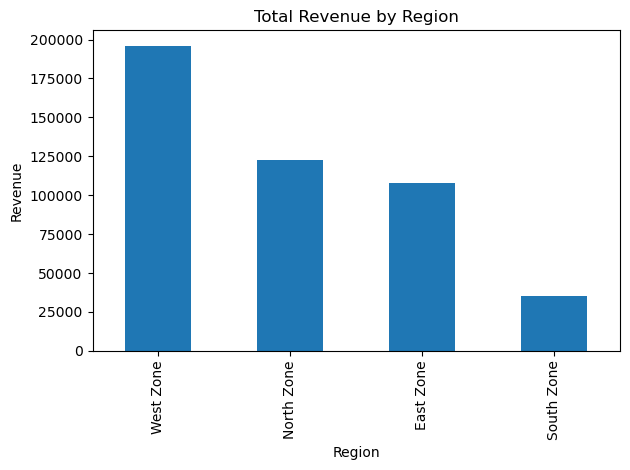

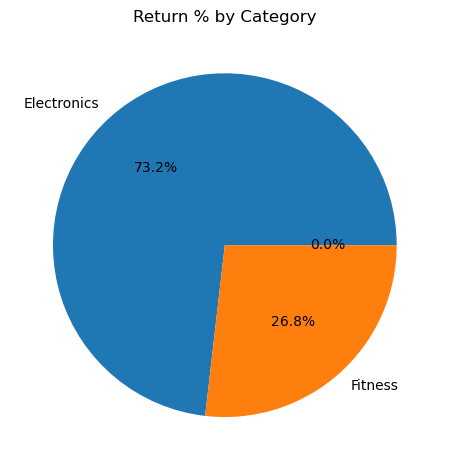

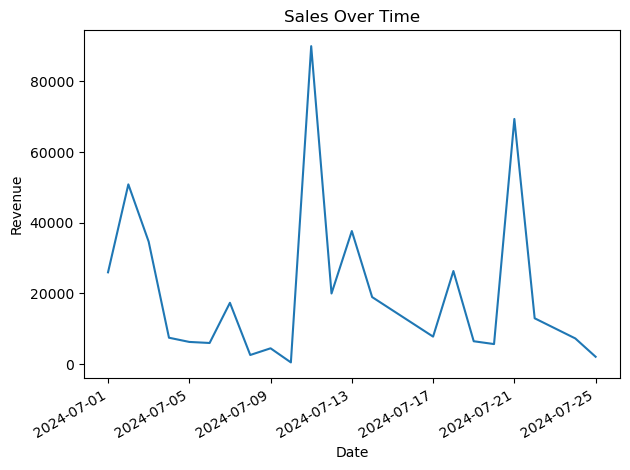

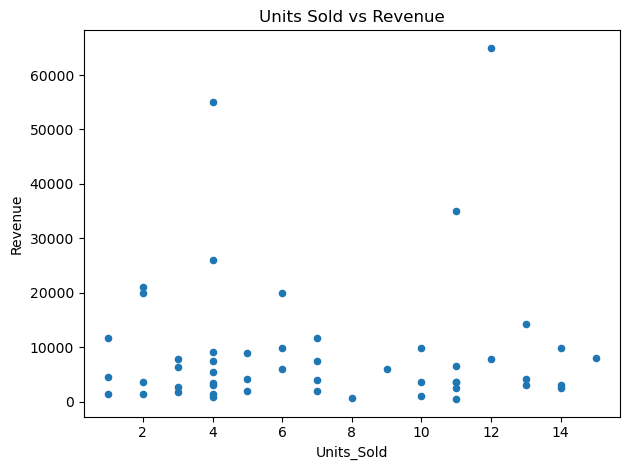

In [21]:
import matplotlib.pyplot as plt

# 0. Create Region Revenue (needed for plot 1)
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)

# 1. Bar chart: Revenue by Region
region_revenue.plot(kind="bar", title="Total Revenue by Region")
plt.ylabel("Revenue")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

# 2. Pie chart: Return % by Category
category_return_rate.plot(kind="pie", autopct="%1.1f%%", title="Return % by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Line chart: Revenue Over Time
daily_sales = df.groupby("Date")["Revenue"].sum()
daily_sales.plot(title="Sales Over Time")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# 4. Scatter plot: Units Sold vs Revenue
df.plot(kind="scatter", x="Units_Sold", y="Revenue", title="Units Sold vs Revenue")
plt.tight_layout()
plt.show()


## 🎯 Strategic Recommendations (SWOT Framework)

Based on the RetailX dataset analysis and visualizations (Bar Chart, Pie Chart, Line Chart, Scatter Plot), 
the following **SWOT-based business recommendations** are proposed:

### 🔹 Strengths
- **North & West regions** demonstrated the highest revenue, indicating strong market presence.  
- **Fitness products** performed well with **low return rates** and healthy margins.  
- Sales showed a **positive growth trend** with spikes during promotional campaigns.  

### 🔹 Weaknesses
- **Electronics category** had the highest return rates, reducing profitability.  
- **South & East regions** underperformed compared to other territories.  
- Heavy reliance on **Cash on Delivery (COD)** increased return risks and cash flow issues.  

### 🔹 Opportunities
- Expanding marketing and inventory in **high-performing regions** (North & West) can further grow revenue.  
- Promoting **Fitness category** as a reliable low-return product line.  
- Using **targeted promotions** around high-demand months to stabilize sales trends.  
- Encouraging **prepaid payment methods** through discounts or loyalty points.  

### 🔹 Threats
- High **return rates in Electronics** may harm brand reputation if not addressed.  
- Overdependence on COD transactions exposes the company to return-related losses.  
- Seasonal dips in sales could hurt revenue stability without corrective actions.  

---

### ✅ Final Recommendation
To maximize profitability, **focus resources on North & West regions**, strengthen the **Fitness product line**, 
and **reduce Electronics returns** through better product quality checks and descriptions.  
At the same time, **gradually shift customers toward prepaid methods** to reduce returns 
and improve revenue consistency across all regions.  
